In [32]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

column_names = ['Ядовитый(p - 1) или съедобный(e - 0)', 'cap-shape','cap-surface','cap-color','bruises?', 'odor', 'gill-attachment', 'gill-spacing',
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',  'ring-type', 
                'spore-print-color', 'population', 'habitat']
raw_dataset = pd.read_csv('mushroom/agaricus-lepiota.data', names=column_names, na_values = "?", comment='\t', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset

,Ядовитый(p - 1) или съедобный(e - 0),cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [33]:
dataset.isna().sum()

Ядовитый(p - 1) или съедобный(e - 0)       0
cap-shape                                  0
cap-surface                                0
cap-color                                  0
bruises?                                   0
odor                                       0
gill-attachment                            0
gill-spacing                               0
gill-size                                  0
gill-color                                 0
stalk-shape                                0
stalk-root                              2480
stalk-surface-above-ring                   0
stalk-surface-below-ring                   0
stalk-color-above-ring                     0
stalk-color-below-ring                     0
veil-type                                  0
veil-color                                 0
ring-number                                0
ring-type                                  0
spore-print-color                          0
population                                 0
habitat   

In [34]:
dataset = dataset.dropna()

data_encoded = pd.get_dummies(dataset, columns=['cap-shape','cap-surface','cap-color','bruises?', 'odor', 'gill-attachment', 'gill-spacing',
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',  'ring-type', 
                'spore-print-color', 'population', 'habitat'])

data_encoded['Ядовитый(p - 1) или съедобный(e - 0)'] = data_encoded['Ядовитый(p - 1) или съедобный(e - 0)'].replace({'p':1, 'e':0})


In [35]:
data_encoded.isna().sum()

Ядовитый(p - 1) или съедобный(e - 0)    0
cap-shape_b                             0
cap-shape_c                             0
cap-shape_f                             0
cap-shape_k                             0
                                       ..
habitat_g                               0
habitat_l                               0
habitat_m                               0
habitat_p                               0
habitat_u                               0
Length: 99, dtype: int64

In [36]:
train_dataset = data_encoded.sample(frac=0.8,random_state=0)
test_dataset = data_encoded.drop(train_dataset.index)
test_dataset

,Ядовитый(p - 1) или съедобный(e - 0),cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
7,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
21,1,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
24,0,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
25,1,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,1,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7910,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7919,0,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
7952,0,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [37]:
train_labels = train_dataset.pop('Ядовитый(p - 1) или съедобный(e - 0)')
test_labels = test_dataset.pop('Ядовитый(p - 1) или съедобный(e - 0)')
print(test_labels)

0       1
7       0
21      1
24      0
25      1
       ..
7805    1
7910    1
7919    0
7952    0
8038    0
Name: Ядовитый(p - 1) или съедобный(e - 0), Length: 1129, dtype: int64


In [38]:
from tensorflow import keras
from keras import models
from keras import layers
import tensorflow as tf

def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
  layers.Dense(64, activation=tf.nn.relu),
  layers.Dense(1, activation=tf.nn.sigmoid)
  ])
  model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
  return model
model = build_model()

model.summary()

#model = keras.Sequential()
#model.add(keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())])),
#model.add(keras.layers.Dense(16, activation=tf.nn.relu))
#model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                6336      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,561
Trainable params: 10,561
Non-trainable params: 0
_________________________________________________________________


In [39]:
x_val = train_dataset[:3000]
partial_x_train = train_dataset[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

In [40]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val),
verbose=1)

Epoch 1/20


12/12 [==============================] - 2s 31ms/step - loss: 0.2065 - accuracy: 0.7393 - val_loss: 0.1468 - val_accuracy: 0.8657
Epoch 2/20
12/12 [==============================] - 0s 12ms/step - loss: 0.1125 - accuracy: 0.8785 - val_loss: 0.0791 - val_accuracy: 0.9007
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0579 - accuracy: 0.9353 - val_loss: 0.0406 - val_accuracy: 0.9670
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0266 - accuracy: 0.9875 - val_loss: 0.0198 - val_accuracy: 0.9867
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0105 - val_accuracy: 0.9943
Epoch 6/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 8/20
12/12 [========

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

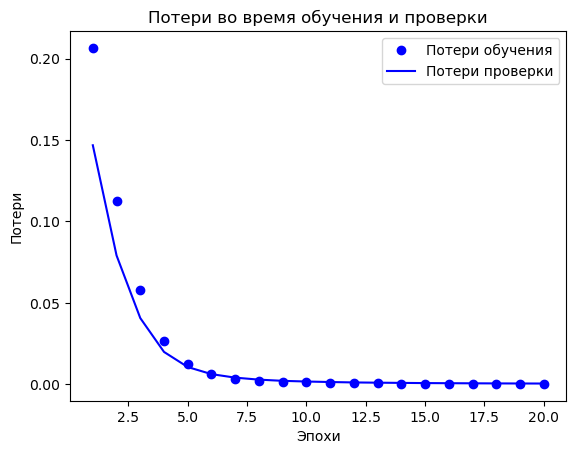

In [42]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" означает "blue dot", синяя точка
plt.plot(epochs, loss, 'bo', label='Потери обучения')
# "b" означает "solid blue line", непрерывная синяя линия
plt.plot(epochs, val_loss, 'b', label='Потери проверки')
plt.title('Потери во время обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

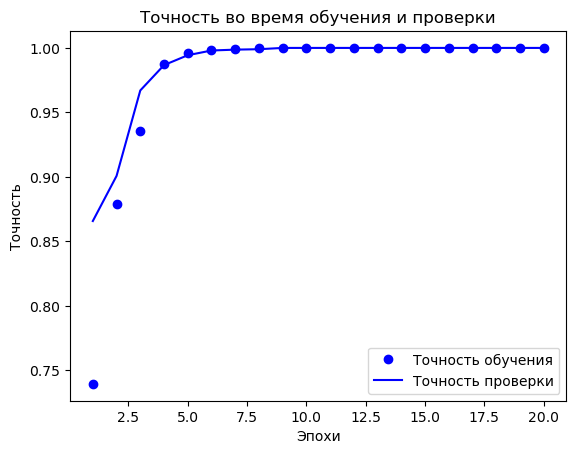

In [43]:
plt.clf() 
# Очистим график

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность проверки')
plt.title('Точность во время обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [44]:
loss, results = model.evaluate(test_dataset, test_labels)
print("Точность: ", results)
print("Потери: ", loss)

31/36 [========================>.....] - ETA: 0s - loss: 1.2916e-04 - accuracy: 1.0000

36/36 [==============================] - 0s 5ms/step - loss: 2.8736e-04 - accuracy: 1.0000
Точность:  1.0
Потери:  0.00028735626256093383


In [45]:
model.save('model_MSE.h5')

model_baza = keras.models.load_model('model_baza.h5')
model_32Neurons = keras.models.load_model('model_32Neurons.h5')
model_Dense3 = keras.models.load_model('model_Dense3.h5')
model_MSE = keras.models.load_model('model_MSE.h5')

test_loss, test_acc = model_baza.evaluate(test_dataset, test_labels)
test_loss1, test_acc1 = model_32Neurons.evaluate(test_dataset, test_labels)
test_loss2, test_acc2 = model_Dense3.evaluate(test_dataset, test_labels)
test_loss3, test_acc3 = model_MSE.evaluate(test_dataset, test_labels)

train_loss, train_acc = model_baza.evaluate(train_dataset, train_labels)
train_loss1, train_acc1 = model_32Neurons.evaluate(train_dataset, train_labels)
train_loss2, train_acc2 = model_Dense3.evaluate(train_dataset, train_labels)
train_loss3, train_acc3 = model_MSE.evaluate(train_dataset, train_labels)

print("Восстановленная модель, точность: {:5.2f}%".format(100*test_acc))

142/142 [==============================] - 0s 3ms/step - loss: 3.1756e-04 - accuracy: 1.0000
Восстановленная модель, точность: 100.00%


In [46]:
model.save('model_MSE.h5')

model_baza = keras.models.load_model('model_baza.h5')
model_32Neurons = keras.models.load_model('model_32Neurons.h5')
model_Dense3 = keras.models.load_model('model_Dense3.h5')
model_MSE = keras.models.load_model('model_MSE.h5')

test_loss, test_acc = model_baza.evaluate(test_dataset, test_labels)
test_loss1, test_acc1 = model_32Neurons.evaluate(test_dataset, test_labels)
test_loss2, test_acc2 = model_Dense3.evaluate(test_dataset, test_labels)
test_loss3, test_acc3 = model_MSE.evaluate(test_dataset, test_labels)

train_loss, train_acc = model_baza.evaluate(train_dataset, train_labels)
train_loss1, train_acc1 = model_32Neurons.evaluate(train_dataset, train_labels)
train_loss2, train_acc2 = model_Dense3.evaluate(train_dataset, train_labels)
train_loss3, train_acc3 = model_MSE.evaluate(train_dataset, train_labels)

print("Восстановленная модель, точность: {:5.2f}%".format(100*test_acc))

142/142 [==============================] - 0s 3ms/step - loss: 3.1756e-04 - accuracy: 1.0000
Восстановленная модель, точность: 100.00%


In [47]:
import pandas as pd

Tablica = pd.DataFrame([['Базовая модель',round(100*train_acc, 2), round(100*train_loss, 2), round(100*test_acc, 2), round(100*test_loss, 2)],
                   ['Модель с 32 нейронами', round(100*train_acc1, 2), round(100*train_loss1, 2), round(100*test_acc1, 2), round(100*test_loss1, 2)],
                   ['Модель с 3 скрытыми слоями',round(100*train_acc2, 2), round(100*train_loss2, 2), round(100*test_acc2, 2), round(100*test_loss2, 2)],
                   ['Модель с функцией потерь mean_squared_error',round(100*train_acc3, 2), round(100*train_loss3, 2), round(100*test_acc3, 2), round(100*test_loss3, 2)],
                   ['Модель с функцией активации tanh',round(100*train_acc4, 2), round(100*train_loss4, 2), round(100*test_acc4, 2), round(100*test_loss4, 2)]],
                   columns=['Параметры модели','Точность учебного набора', 'Потери учебного набора', 'Точность контрольного набора ', 'Потери контрольного набора'])

Tablica

NameError: name 'train_acc4' is not defined